In [1]:
import pandas as pd

# Assignment 1: Date Formats and Date Parts

* First, convert the `date` column to datetime64, by any method.

* Then, create a column representing the time difference between the last date in the data and each date. 

* Next, create columns for the date parts year, month, and weekday.

* Finally, format the date to Year-Month-Day (This will be a string/object).

In [48]:
# read in transactions.csv 
transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

In [49]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [50]:
transactions["date"].astype({"date":"datetime64[ns]"})


0       2013-01-01
1       2013-01-02
2       2013-01-02
3       2013-01-02
4       2013-01-02
           ...    
83483   2017-08-15
83484   2017-08-15
83485   2017-08-15
83486   2017-08-15
83487   2017-08-15
Name: date, Length: 83488, dtype: datetime64[ns]

In [51]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [38]:
df1 = (transactions.assign(
    difference = lambda x : (transactions['date'].max()) - x['date'],
    year = transactions["date"].dt.year,
    month = transactions["date"].dt.month,
    day_of_week = transactions["date"].dt.dayofweek
)
)

df1.head()

,date,store_nbr,transactions,difference,year,month,day_of_week
0,2013-01-01,25,770,1687 days,2013,1,1
1,2013-01-02,1,2111,1686 days,2013,1,2
2,2013-01-02,2,2358,1686 days,2013,1,2
3,2013-01-02,3,3487,1686 days,2013,1,2
4,2013-01-02,4,1922,1686 days,2013,1,2


In [39]:
transactions["date"] = transactions["date"].dt.strftime("%Y-%B-%d")
transactions.head()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [40]:
transactions.head()

,date,store_nbr,transactions
0,2013-January-01,25,770
1,2013-January-02,1,2111
2,2013-January-02,2,2358
3,2013-January-02,3,3487
4,2013-January-02,4,1922


# Assignment 2: Time Arithmetic


Hi again,

I just got word the the true max date in our data was three weeks after 2017-08-15.

* Can you add three weeks to the ‘time_to_last_date’ column? 
* Then, calculate ‘weeks_to_last_date’ by dividing the number of days  in ‘time_to_last_date’ by 7.

Thanks

In [68]:
# overwrite previous transactions df and convert date column

transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

In [69]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [70]:
# recreate columns from assignment 1 using assign

transactions = transactions.assign(
    year=transactions["date"].dt.year,
    month=transactions["date"].dt.month,
    day_of_week=transactions["date"].dt.dayofweek,
    time_to_last_date= (transactions["date"].max()) - transactions["date"],
)

transactions.head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days
1,2013-01-02,1,2111,2013,1,2,1686 days
2,2013-01-02,2,2358,2013,1,2,1686 days
3,2013-01-02,3,3487,2013,1,2,1686 days
4,2013-01-02,4,1922,2013,1,2,1686 days


In [71]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   date               83488 non-null  datetime64[ns] 
 1   store_nbr          83488 non-null  int64          
 2   transactions       83488 non-null  int64          
 3   year               83488 non-null  int32          
 4   month              83488 non-null  int32          
 5   day_of_week        83488 non-null  int32          
 6   time_to_last_date  83488 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), int32(3), int64(2), timedelta64[ns](1)
memory usage: 3.5 MB


In [72]:
transactions.assign(
    time_to_last_date=pd.to_timedelta(21, unit="D") + transactions["time_to_last_date"],
    weeks_to_last_date=(lambda x: x["time_to_last_date"].dt.days / 7),
).head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,2013,1,1,1708 days,244.000000
1,2013-01-02,1,2111,2013,1,2,1707 days,243.857143
2,2013-01-02,2,2358,2013,1,2,1707 days,243.857143
3,2013-01-02,3,3487,2013,1,2,1707 days,243.857143
4,2013-01-02,4,1922,2013,1,2,1707 days,243.857143


In [ ]:
transactions.head()

# Assignment 3: Missing Time Series Data

Take a look at the mean value for the oil price using forward fill, backfill, and interpolation. Are they very different?

Then, plot the series with forward fill for:
 * The year 2014.
 * The month of December 2014.
 * The days from December 1st to December 15th, 2014.


In [82]:
# Read in oil csv with date as index (and converted to datetime64)
oil = pd.read_csv("../retail/oil.csv", 
                  index_col="date", 
                  parse_dates=True)

In [83]:
# This is a synonym for datetime64

oil.index.dtype

dtype('<M8[ns]')

In [91]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [95]:
# mean of original series

oil.mean()

dcoilwtico    67.714366
dtype: float64

<Axes: xlabel='date'>

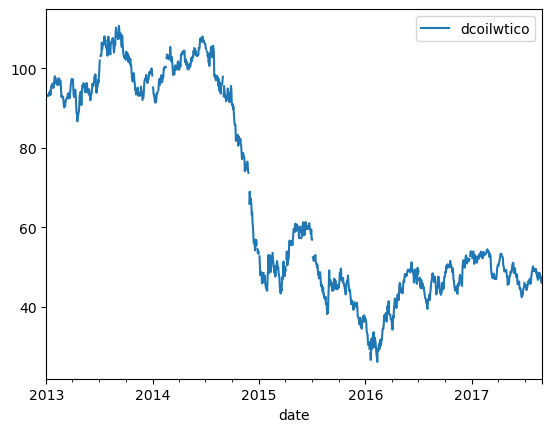

In [76]:
# original plot

oil.plot()

<Axes: xlabel='date'>

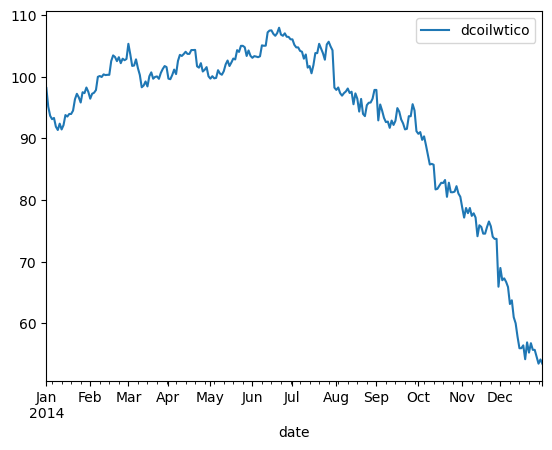

In [94]:
oil.ffill().loc['2014'].plot()


<Axes: xlabel='date'>

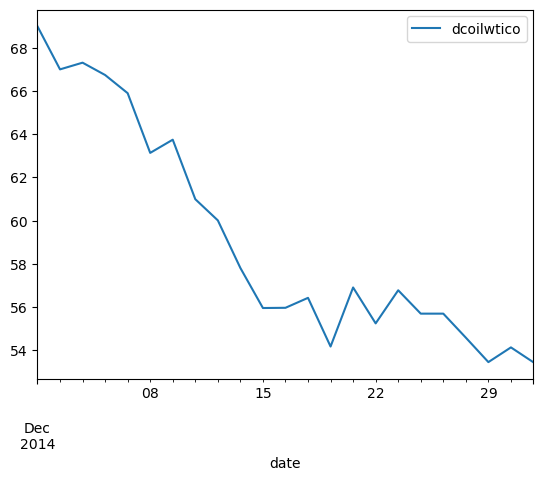

In [98]:
oil.ffill().loc['2014-12-01' : '2014-12-31'].plot()

<Axes: xlabel='date'>

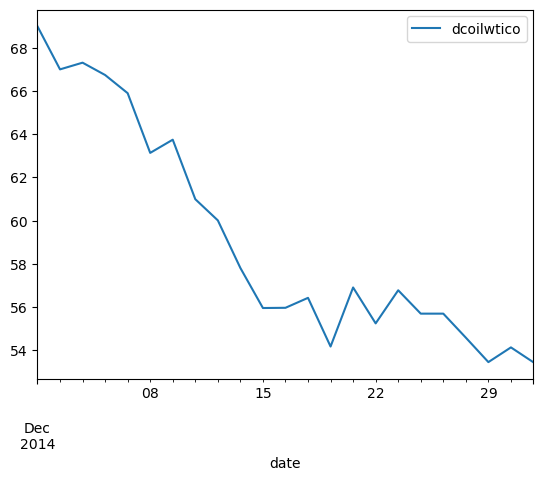

In [99]:
oil.loc["2014-12"].ffill().plot()

# Assignment 4: Shift and Diff

Hello,
I’m looking into a few different year over year trends related to changes made at store 47.

Can you plot the sum of monthly of transactions in year 2015 vs the sum of monthly transactions in the year prior for store 47?

Make sure to group your DataFrame by year AND month!

Thanks

In [134]:
#getting the query of store 47 which are done in 2015
dff = transactions.set_index('date').query("index >= '2015' & index <= '2016' & store_nbr == 47")
dff.head()


,store_nbr,transactions,year,month,day_of_week,time_to_last_date
date,,,,,,
2015-01-02,47,4937,2015,1,4,956 days
2015-01-03,47,4950,2015,1,5,955 days
2015-01-04,47,5083,2015,1,6,954 days
2015-01-05,47,4310,2015,1,0,953 days
2015-01-06,47,3772,2015,1,1,952 days


In [178]:
#getting the query of store 47 which are done in 2015

dff = transactions.query("year <= 2015 & year >= 2014 & store_nbr == 47").loc[:,["date", "transactions"]]
dff.head()

,date,transactions
16950,2014-01-02,4334
16997,2014-01-03,3914
17044,2014-01-04,5232
17091,2014-01-05,5234
17138,2014-01-06,3675


In [179]:
# grouping by monthly
dff = (dff.groupby([transactions["date"].dt.year, transactions["date"].dt.month])['transactions'].sum())
dff


date  date
2014  1       114190
      2       107175
      3       121771
      4       122976
      5       126298
      6       118398
      7       118522
      8       121949
      9       115552
      10      116741
      11      116996
      12      147371
2015  1       118445
      2       108186
      3       119883
      4       118449
      5       120810
      6       110814
      7       116234
      8       119307
      9       112975
      10      117712
      11      117564
      12      149747
Name: transactions, dtype: int64

<Axes: xlabel='date'>

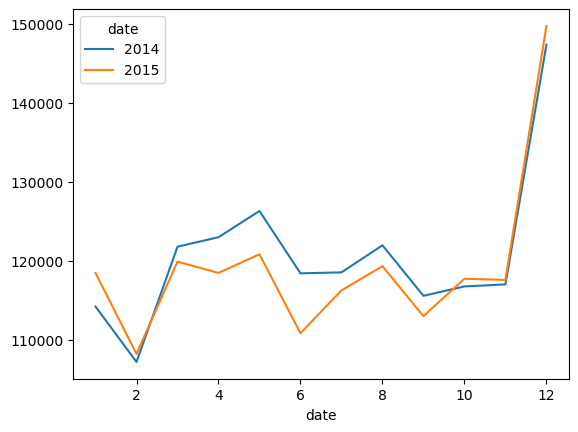

In [181]:
dff.unstack(level=0).plot()

# Assignment 5: Resampling Time Series

Plot the monthly and yearly average oil prices.

<Axes: xlabel='date'>

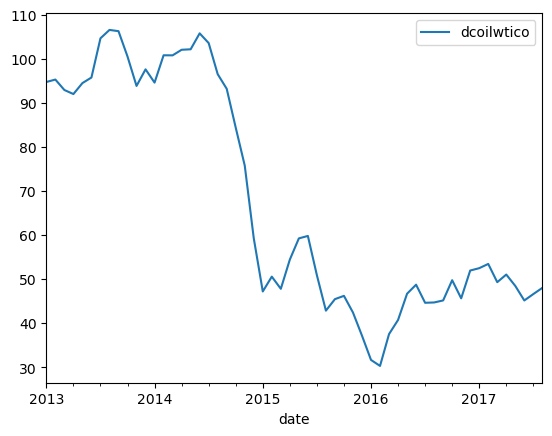

In [189]:
oil.resample("ME").mean().plot()

<Axes: xlabel='date'>

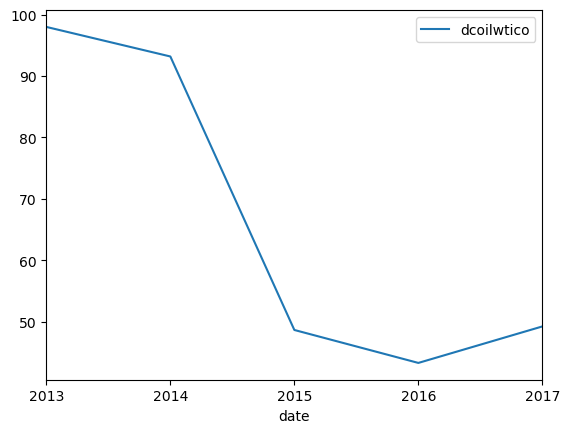

In [190]:
oil.resample("YE").mean().plot()

C:\Users\sesha\AppData\Local\Temp\ipykernel_18492\2797350903.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  oil.resample(period).mean().plot()


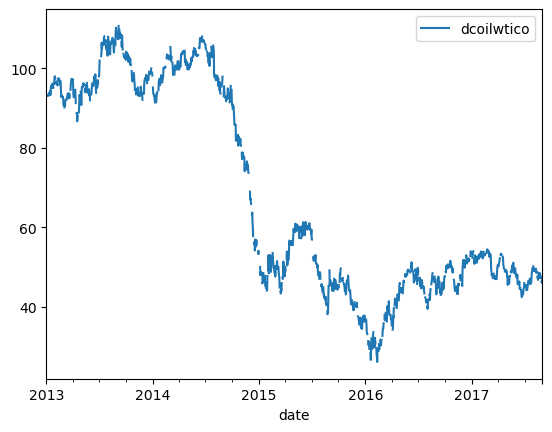

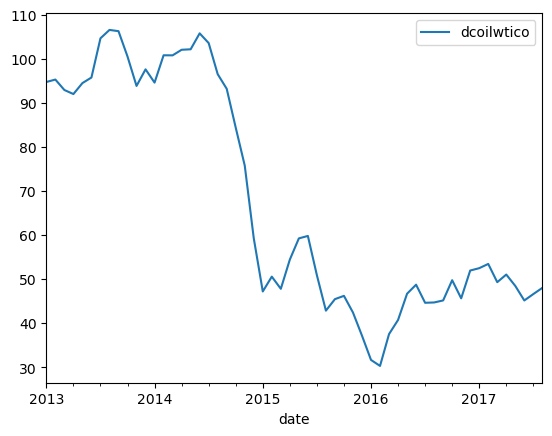

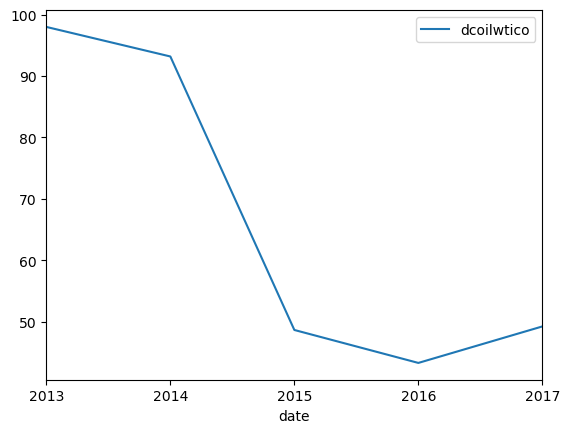

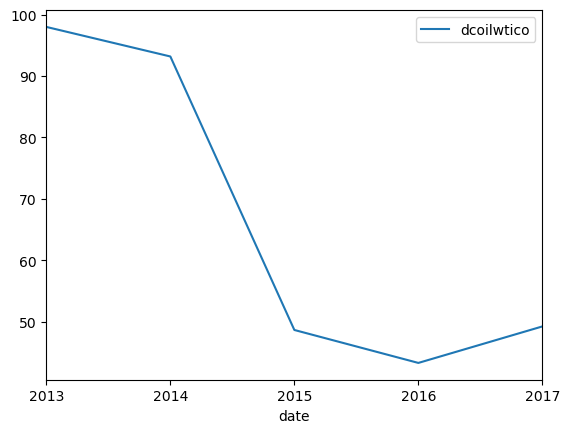

In [192]:
for period in ["D", "ME", "YE","A"]:
    oil.resample(period).mean().plot()


# Assignment 6: Rolling Averages

Plot the 90-day moving average for transactions for store 47.

This will help remove some of the noise from our series.

Thanks!


In [193]:
# recreate transactions_47 with date as index 

transactions_47 = (transactions
                   .loc[transactions["store_nbr"]==47, ["date", "transactions"]]
                   .set_index("date"))

transactions_47.head()

,transactions
date,
2013-01-02,4161
2013-01-03,3660
2013-01-04,3915
2013-01-05,4764
2013-01-06,4935


<Axes: xlabel='date'>

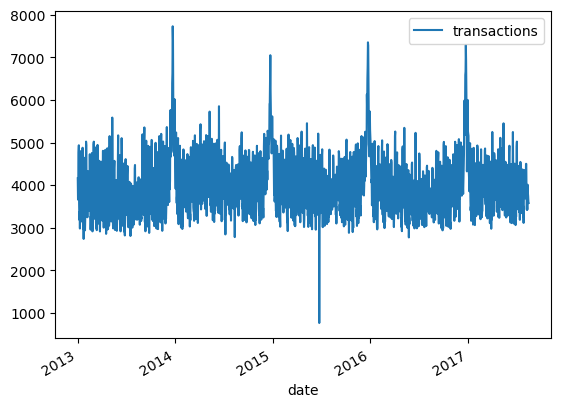

In [194]:
# original daily series for comparison

transactions_47.plot()

<Axes: xlabel='date'>

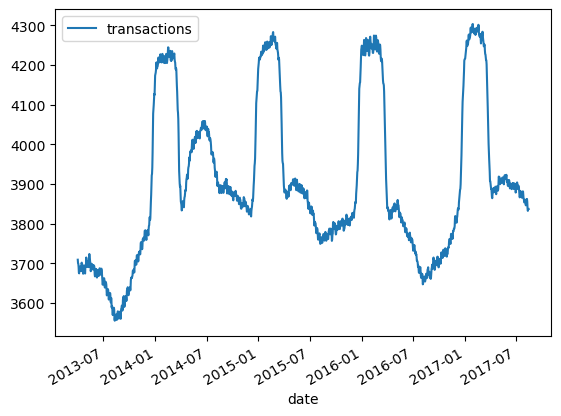

In [200]:
transactions_47.rolling(90).mean().plot()